# HOD module

`Hod` is the standard Halo Ocupation Distribution (HOD):
$$
  n_\mathrm{cen}(M, z) = \frac{1}{2} \mathrm{erf} \left[ \frac{\log_{10} M - \log_{10} M_\mathrm{min}}{\sigma_{\log M}} \right]
$$
$$
  n_\mathrm{sat}(M, z) = \left( \frac{M - M_0}{M_1} \right)^\alpha
$$

The redshift dependence is characterised by polynomials,
$$
  \log_{10} M_\mathrm{min}(z) = c_0 + c_1 (z - z_0) + c_2 (z - z_0)^2 + c_3 (z - z_0)^3,
$$
where $z_0 = 0.5$ is an arbitray fiducial redshift. The result does not depend on the choise of $z_0$.

$$
  \sigma_{\log M}(z) = c_4 + c_5 (z - z_0)
$$

$$
  M_0(z) = M_\mathrm{min}(z)
$$

$$
  \log_{10} M_1(z) = c_6 + c_7 (z - z_0)
$$

$$
  \alpha(z) = c_8 + c_9 (z - z_0)
$$

### HOD object
hod = **Hod**()

Operation | Result
---------------- | -------------
len(hod)         | length of the HOD coefficients $c_i$
hod[i]           | $i$th coefficient $c_i$
hod.get_coef()       | an array of all coefficients $c$
hod.set_coef(coef)    | set all coefficients to those in an array *coef*
hod.logMmin(z)   |  $\log_{10} M_\mathrm{min}(z)$
hod.sigma(z)     |  $\sigma_{\log M}(z)$
hod.logM1(z)     | $\log_{10} M_1(z)$
hod.alpha(z)     | $\alpha(z)$
hod.ncen(M,z)    | probability of having a central galaxy
hod.nsat(M,z)    | mean number of satellite galaxies if the halo has a central



## Examples

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import mockgallib as mock

mock.cosmology_set(0.31) # set omega_m

hod = mock.Hod()
hod

HOD coef= [12.0, 0.0, 2.0, 0.0, 0.1, 0.0, 15.0, 0.0, 1.5, 0.0]

HOD coef= [11.5, 0.5, 0.0, 0.0, 1.0, 0.0, 13.0, 0.0, 1.5, 0.0]


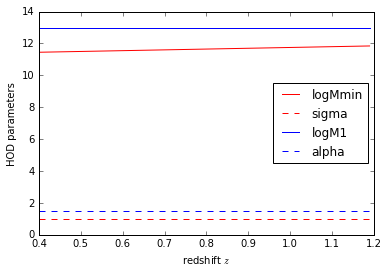

In [7]:
# set coefficient
hod.set_coef([12.0, 0.5, 0, 0, 1.0, 0.0, 13.0, 0.0, 1.5, 0.0])
hod[0]= 11.5
print(hod)

# plot HOD parameters
z = np.arange(0.4, 1.2, 0.01)
logMmin = [hod.logMmin(zz) for zz in z]
sigma = [hod.sigma(zz) for zz in z]
logM1 = [hod.logM1(zz) for zz in z]
alpha = [hod.alpha(zz) for zz in z]

plt.plot(z, logMmin, 'r-', label='logMmin') 
plt.plot(z, sigma, 'r--', label='sigma')
plt.plot(z, logM1, 'b-', label='logM1')
plt.plot(z, alpha, 'b--', label='alpha')
plt.xlabel('redshift $z$')
plt.ylabel('HOD parameters')
plt.legend(loc='center right')
plt.show();

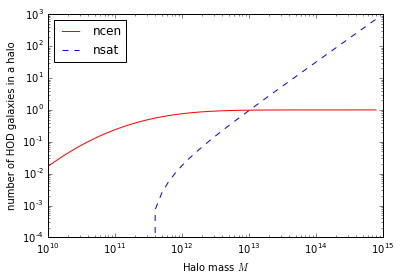

In [8]:
z = 0.5
logMmin = 10
logMmax = 16
M = np.exp(np.arange(10, 15, 0.1)*math.log(10))

ncen = [hod.ncen(MM, z) for MM in M]
nsat = [hod.nsat(MM, z) for MM in M]

plt.plot(M, ncen, 'r-', label='ncen') 
plt.plot(M, nsat, 'b--', label='nsat')
plt.xlabel('Halo mass $M$')
plt.ylabel('number of HOD galaxies in a halo')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left')
plt.show();

In [2]:
%%html
<style>table {float:left}</style>